In [116]:
# Import dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np

In [117]:
# Import the data to pandas and display it
# Light cleaning to remove irrelevant columns and drop nas
loan_df=pd.read_csv('../Resources/loan_data.csv')
loan_df=loan_df.drop(columns=['DAYS_EMPLOYED','NAME_INCOME_TYPE'])
loan_df=loan_df.dropna()
loan_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,OCCUPATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Secondary / secondary special,House / apartment,Laborers
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Higher education,House / apartment,Core staff
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Secondary / secondary special,House / apartment,Laborers
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Secondary / secondary special,House / apartment,Laborers
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Secondary / secondary special,House / apartment,Core staff
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307504,456248,0,Cash loans,F,N,Y,0,153000.0,331920.0,16096.5,225000.0,Secondary / secondary special,House / apartment,Sales staff
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Secondary / secondary special,With parents,Sales staff
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Higher education,House / apartment,Managers
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,Secondary / secondary special,House / apartment,Laborers


In [118]:
# Display data types for each column
loan_df.dtypes

SK_ID_CURR               int64
TARGET                   int64
NAME_CONTRACT_TYPE      object
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
AMT_CREDIT             float64
AMT_ANNUITY            float64
AMT_GOODS_PRICE        float64
NAME_EDUCATION_TYPE     object
NAME_HOUSING_TYPE       object
OCCUPATION_TYPE         object
dtype: object

In [119]:
# Create dummy variables in the selected columns
loan_df_dummies = pd.get_dummies(loan_df, columns=['NAME_EDUCATION_TYPE','NAME_HOUSING_TYPE','OCCUPATION_TYPE'], drop_first=True,dtype=int)
loan_df_dummies

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,1,0,0,0,0,0,0,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,1,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,1,0,0,0,0,0,0,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307504,456248,0,Cash loans,F,N,Y,0,153000.0,331920.0,16096.5,...,0,0,0,0,0,0,1,0,0,0
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,0,0,1,0,0,0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,1,0,0,0,0,0,0,0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,1,0,0,0,0,0,0,0,0,0


In [120]:
# Define the dependent and independent variables
data=loan_df.drop(columns=['TARGET'])
target=loan_df['TARGET']

In [121]:
# Display data
data.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,OCCUPATION_TYPE
0,100002,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Secondary / secondary special,House / apartment,Laborers
1,100003,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Higher education,House / apartment,Core staff
2,100004,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Secondary / secondary special,House / apartment,Laborers
3,100006,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Secondary / secondary special,House / apartment,Laborers
4,100007,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Secondary / secondary special,House / apartment,Core staff


In [122]:
# Get dummies for data
data = pd.get_dummies(data)
data.head()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,...,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
0,100002,0,202500.0,406597.5,24700.5,351000.0,True,False,False,True,...,True,False,False,False,False,False,False,False,False,False
1,100003,0,270000.0,1293502.5,35698.5,1129500.0,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,100004,0,67500.0,135000.0,6750.0,135000.0,False,True,False,True,...,True,False,False,False,False,False,False,False,False,False
3,100006,0,135000.0,312682.5,29686.5,297000.0,True,False,True,False,...,True,False,False,False,False,False,False,False,False,False
4,100007,0,121500.0,513000.0,21865.5,513000.0,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [123]:
# Use split data to create testing and training data sets
X_train, X_test, y_train, y_test = train_test_split(data,target, random_state=78)

In [124]:
# Instantiate a StandardScaler instance
scaler = StandardScaler()

# Fit the training data to the standard scaler
X_scaler = scaler.fit(X_train)

# Transform the training data using the scaler
X_train_scaled = X_scaler.transform(X_train)

# Transform the testing data using the scaler
X_test_scaled = X_scaler.transform(X_test)

In [125]:
# Instantiate the KNeighborsClassifier model 
knn = KNeighborsClassifier(n_neighbors=3)

In [126]:
# Train the model using the training data
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [127]:
# Create predictions using the testing data
y_pred = knn.predict(X_test_scaled)

In [128]:
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     48032
           1       0.14      0.04      0.06      4690

    accuracy                           0.89     52722
   macro avg       0.52      0.51      0.50     52722
weighted avg       0.84      0.89      0.86     52722



In [129]:
# Selecting data for visualization
X_test_subset = X_test_scaled[:, :4]

In [130]:
class_mapping = {0: "No Default", 1: "Default"}
y_pred_labels = [class_mapping[label] for label in y_pred]

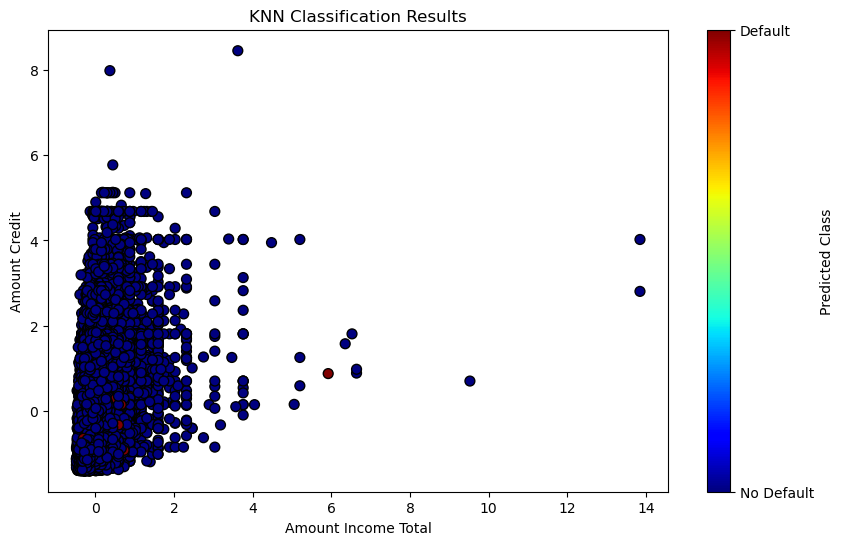

In [131]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_test_subset[:, 2], X_test_subset[:, 3], c=y_pred, cmap='jet', edgecolor='k', s=50)
plt.title('KNN Classification Results')
plt.xlabel('Amount Income Total')
plt.ylabel('Amount Credit')
cbar = plt.colorbar(scatter, ticks=np.unique(y_pred))
cbar.ax.set_yticklabels([class_mapping[i] for i in np.unique(y_pred)])
cbar.set_label('Predicted Class')
plt.show()

In [132]:
# Selecting data for visualization
X_test_subset = X_test_scaled[:, :6]

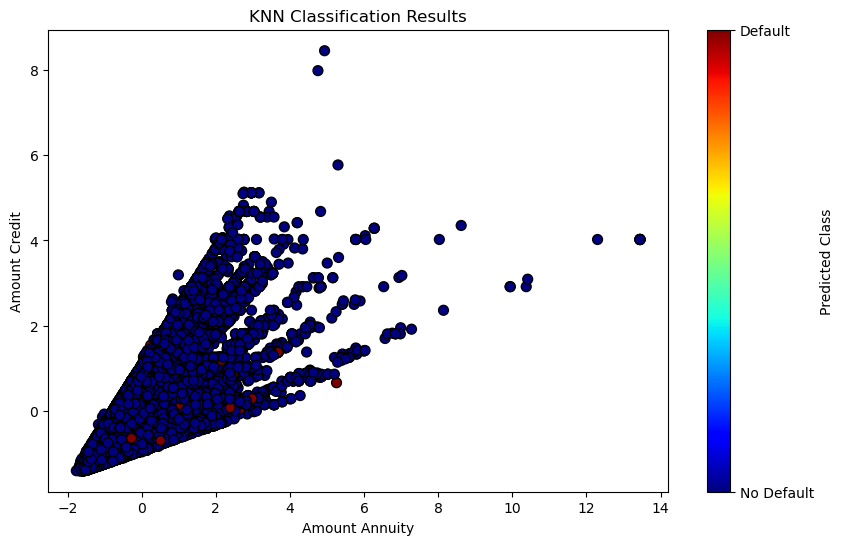

In [135]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_test_subset[:, 4], X_test_subset[:, 3], c=y_pred, cmap='jet', edgecolor='k', s=50)
plt.title('KNN Classification Results')
plt.xlabel('Amount Annuity')
plt.ylabel('Amount Credit')
cbar = plt.colorbar(scatter, ticks=np.unique(y_pred))
cbar.ax.set_yticklabels([class_mapping[i] for i in np.unique(y_pred)])
cbar.set_label('Predicted Class')
plt.show()

In [134]:
for index, column in enumerate(data.columns):
    print(f"Index: {index}, Column Name: {column}")

Index: 0, Column Name: SK_ID_CURR
Index: 1, Column Name: CNT_CHILDREN
Index: 2, Column Name: AMT_INCOME_TOTAL
Index: 3, Column Name: AMT_CREDIT
Index: 4, Column Name: AMT_ANNUITY
Index: 5, Column Name: AMT_GOODS_PRICE
Index: 6, Column Name: NAME_CONTRACT_TYPE_Cash loans
Index: 7, Column Name: NAME_CONTRACT_TYPE_Revolving loans
Index: 8, Column Name: CODE_GENDER_F
Index: 9, Column Name: CODE_GENDER_M
Index: 10, Column Name: CODE_GENDER_XNA
Index: 11, Column Name: FLAG_OWN_CAR_N
Index: 12, Column Name: FLAG_OWN_CAR_Y
Index: 13, Column Name: FLAG_OWN_REALTY_N
Index: 14, Column Name: FLAG_OWN_REALTY_Y
Index: 15, Column Name: NAME_EDUCATION_TYPE_Academic degree
Index: 16, Column Name: NAME_EDUCATION_TYPE_Higher education
Index: 17, Column Name: NAME_EDUCATION_TYPE_Incomplete higher
Index: 18, Column Name: NAME_EDUCATION_TYPE_Lower secondary
Index: 19, Column Name: NAME_EDUCATION_TYPE_Secondary / secondary special
Index: 20, Column Name: NAME_HOUSING_TYPE_Co-op apartment
Index: 21, Column Na